In [2]:
import multiprocessing
num_cores = multiprocessing.cpu_count()
print(num_cores)

16


In [8]:
import optuna
import pandas as pd

distributions = {
    "batch_size": optuna.distributions.CategoricalDistribution([16, 32, 64, 128]),
    "learning_rate": optuna.distributions.LogUniformDistribution(0.0001, 0.1),
    "weight_decay": optuna.distributions.LogUniformDistribution(0.00001, 0.01),
    "sgd_momentum": optuna.distributions.UniformDistribution(0.8, 0.99),
    "scheduler_gamma": optuna.distributions.UniformDistribution(0.8, 0.99),
    "pos_weight": optuna.distributions.CategoricalDistribution([0.5, 0.7, 0.9, 1.0, 1.3, 1.5]),
    "model_embedding_size": optuna.distributions.CategoricalDistribution([64, 128, 256, 512]),
    "model_attention_heads": optuna.distributions.CategoricalDistribution([1, 2, 3, 4, 5]),
    "model_layers": optuna.distributions.CategoricalDistribution([1, 2, 3, 4, 5]),
    "model_dropout_rate": optuna.distributions.UniformDistribution(0.2, 0.8),
    "model_top_k_ratio": optuna.distributions.UniformDistribution(0.25, 0.8),
    "model_top_k_every_n": optuna.distributions.CategoricalDistribution([1, 2, 3, 5]),
    "model_dense_neurons": optuna.distributions.CategoricalDistribution([128, 256, 512]),
}


df = pd.read_csv('data/validation/optuna_results.csv')

print("Prima della pulizia:")
print(df.info())

# stampa lap rima riga del dataframe
print(df.head(1))
# Assicurati che le colonne siano numeriche
# df['trial_obj'] = pd.to_numeric(df['trial_obj'], errors='coerce')
# df['roc'] = pd.to_numeric(df['roc'], errors='coerce')


# conta i valori nulli
print("Valori nulli per colonna:")
print(df.isnull().sum())

# Filtra le righe con valori NaN nelle metriche
# # df = df.dropna(subset=['trial_obj', 'roc'])

# print("Dopo la pulizia:")
# print(df.info())


study = optuna.create_study(directions=["minimize", "minimize"], load_if_exists=True)

# Ottieni il numero di trial attuali nello studio
existing_trials = len(study.trials)
print(f"Numero di trial esistenti nello studio: {existing_trials}")

# Aggiungi i risultati precedenti allo studio
for _, row in df.iterrows():
    trial = optuna.trial.create_trial(
        params={key: row[key] for key in distributions.keys()},  # Parametri del trial
        distributions=distributions,  # Distribuzioni dei parametri
        values=[row['loss'],row["roc"]]   # Valore dell'obiettivo
    )
    study.add_trial(trial)

# Verifica se tutti i trial sono stati aggiunti
total_trials = len(study.trials)
print(f"Numero di trial nel CSV: {len(df)}")
print(f"Numero totale di trial dopo l'aggiunta: {total_trials}")

if total_trials - existing_trials == len(df):
    print("Tutti i trial passati sono stati aggiunti correttamente.")
else:
    print(f"Attenzione: Non tutti i trial sono stati aggiunti correttamente. Aggiunti: {total_trials - existing_trials} su {len(df)}")

C:\Users\mitic\AppData\Local\Temp\ipykernel_43896\3328255511.py:6: FutureWarning: LogUniformDistribution has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :class:`~optuna.distributions.FloatDistribution` instead.
  "learning_rate": optuna.distributions.LogUniformDistribution(0.0001, 0.1),
C:\Users\mitic\AppData\Local\Temp\ipykernel_43896\3328255511.py:7: FutureWarning: LogUniformDistribution has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :class:`~optuna.distributions.FloatDistribution` instead.
  "weight_decay": optuna.distributions.LogUniformDistribution(0.00001, 0.01),
C:\Users\mitic\AppData\Local\Temp\ipykernel_43896\3328255511.py:8: FutureWarning: UniformDistribution has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :class:`~optuna.di

Prima della pulizia:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trial_number           70 non-null     int64  
 1   batch_size             70 non-null     int64  
 2   learning_rate          70 non-null     float64
 3   weight_decay           70 non-null     float64
 4   sgd_momentum           70 non-null     float64
 5   scheduler_gamma        70 non-null     float64
 6   pos_weight             70 non-null     float64
 7   model_embedding_size   70 non-null     int64  
 8   model_attention_heads  70 non-null     int64  
 9   model_layers           70 non-null     int64  
 10  model_dropout_rate     70 non-null     float64
 11  model_top_k_ratio      70 non-null     float64
 12  model_top_k_every_n    70 non-null     int64  
 13  model_dense_neurons    70 non-null     int64  
 14  epochs                 70 non-null     

c:\Users\mitic\anaconda3\envs\trial_arch\lib\site-packages\optuna\distributions.py:781: FutureWarning: LogUniformDistribution(high=0.1, low=0.0001) is deprecated and internally converted to FloatDistribution(high=0.1, log=True, low=0.0001, step=None). See https://github.com/optuna/optuna/issues/2941.
  warnings.warn(message, FutureWarning)
c:\Users\mitic\anaconda3\envs\trial_arch\lib\site-packages\optuna\distributions.py:781: FutureWarning: LogUniformDistribution(high=0.01, low=1e-05) is deprecated and internally converted to FloatDistribution(high=0.01, log=True, low=1e-05, step=None). See https://github.com/optuna/optuna/issues/2941.
  warnings.warn(message, FutureWarning)
c:\Users\mitic\anaconda3\envs\trial_arch\lib\site-packages\optuna\distributions.py:781: FutureWarning: UniformDistribution(high=0.99, low=0.8) is deprecated and internally converted to FloatDistribution(high=0.99, log=False, low=0.8, step=None). See https://github.com/optuna/optuna/issues/2941.
  warnings.warn(mess

In [9]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
from rdkit.Chem import DataStructs

In [10]:
smiles = "CC(O)C"  # Propanolo
mol = Chem.MolFromSmiles(smiles)

# Supponiamo di avere un frammento estratto (ad esempio un singolo gruppo -OH)
fragment_smiles = "O"
fragment = Chem.MolFromSmiles(fragment_smiles)

# Trova gli atomi confinanti al frammento
def find_neighboring_atoms(molecule, fragment):
    # Cerca il matching del frammento nella molecola
    match = molecule.GetSubstructMatch(fragment)
    neighboring_atoms = set()
    
    # Per ogni atomo nel frammento, trova i suoi vicini nella molecola
    for atom_idx in match:
        atom = molecule.GetAtomWithIdx(atom_idx)
        for neighbor in atom.GetNeighbors():
            if neighbor.GetIdx() not in match:
                neighboring_atoms.add(neighbor.GetIdx())
    
    return neighboring_atoms

# Identifica gli atomi confinanti
neighboring_atoms = find_neighboring_atoms(mol, fragment)
print(f"Atomi confinanti: {neighboring_atoms}")

Atomi confinanti: {1}


In [7]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
from rdkit.Chem import DataStructs

# Molecola in SMILES
mol = Chem.MolFromSmiles("CC/C=C\C/C=C\C/C=C\C/C=C\C/C=C\CCCC(=O)O[C@@H](COC(=O)CCCCCCCCC/C=C\CCCCCC)COC(=O)CCCCCCCCCCCCCCCCCCCCCCC")  # Etanolo

# Calcola la Morgan fingerprint (ECFP4) con raggio 2
ecfp4 = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=512 )
# print(ecfp4.ToBitString())

# Calcola la Functional-Class fingerprint (FCFP4) con raggio 2
fcfp4 = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, useFeatures=True, nBits=512 )
# print(fcfp4.ToBitString())

# Converti le fingerprints ECFP e FCFP in array numpy
ecfp4_array = np.zeros((1, 512 ))
fcfp4_array = np.zeros((1, 512 ))
DataStructs.ConvertToNumpyArray(ecfp4, ecfp4_array)
DataStructs.ConvertToNumpyArray(fcfp4, fcfp4_array)

# Concatenazione delle fingerprints
concatenated_fingerprint = np.concatenate((ecfp4_array, fcfp4_array))

# Visualizza la fingerprint concatenata
print(concatenated_fingerprint)

[0. 1. 0. ... 0. 0. 0.]


[18:04:33] DEPRECATION WARNING: please use MorganGenerator
[18:04:33] DEPRECATION WARNING: please use MorganGenerator


In [38]:
import hashlib
import numpy as np

def wildcard_to_n_bit(wildcard_count, n_bits=512):
    # Converti il numero di wildcard in stringa
    wildcard_str = str(wildcard_count)
    
    # Usa SHA-256 per generare un hash (256 bit)
    hash_object = hashlib.sha256(wildcard_str.encode())
    
    # Converti l'hash in una stringa binaria
    binary_hash = bin(int(hash_object.hexdigest(), 16))[2:].zfill(256)  # SHA-256 è 256 bit
    
    # Estendi o riduci a n_bits (ripetendo o troncando)
    repeated_hash = (binary_hash * (n_bits // len(binary_hash) + 1))[:n_bits]
    
    # Converti la stringa binaria in un array numpy
    fingerprint_array = np.array([int(bit) for bit in repeated_hash])
    
    return fingerprint_array

# Esempio di utilizzo con wildcard=1 e wildcard=2
wildcard_1_fingerprint = wildcard_to_n_bit(1)
wildcard_2_fingerprint = wildcard_to_n_bit(2)
wildcard_3_fingerprint = wildcard_to_n_bit(3)
wildcard_10_fingerprint = wildcard_to_n_bit(10)

print("Fingerprint per wildcard=1:", wildcard_1_fingerprint)
print("Fingerprint per wildcard=2:", wildcard_2_fingerprint)
print("Fingerprint per wildcard=3:", wildcard_3_fingerprint)
print("Fingerprint per wildcard=10:", wildcard_10_fingerprint)


Fingerprint per wildcard=1: [0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1
 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0
 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0
 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1
 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1]
Fingerprint per wildcard=2: [1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0
 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0
 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0
 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 

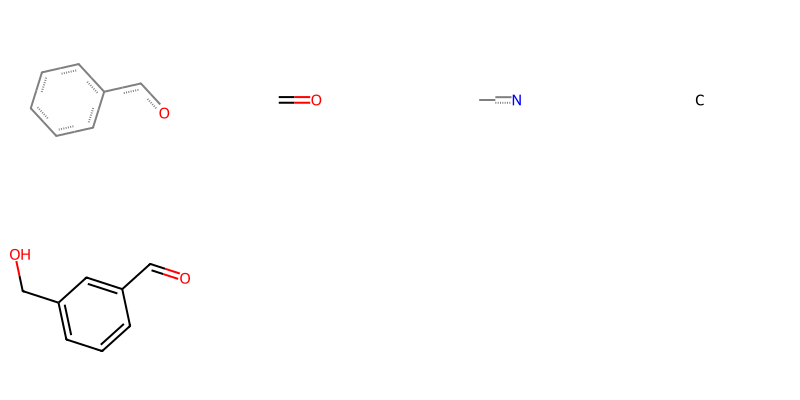

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
from rdkit.Chem import DataStructs
smiles = "CN(C)C(=O)c1ccc(CO)cc1"
mol = Chem.MolFromSmiles(smiles)
fragment1 = Chem.MolFromSmarts("c1ccc(CO)cc1")
fragment2 = Chem.MolFromSmarts("C(=O)")
fragment3 = Chem.MolFromSmarts("CN")
fragment4 = Chem.MolFromSmarts("C")

#saniteize them
Chem.SanitizeMol(fragment1)
Chem.SanitizeMol(fragment2)
Chem.SanitizeMol(fragment3)
Chem.SanitizeMol(fragment4)


fragment5 = "c1ccc(CO)cc1" + "C(=O)" 
fragment5 = Chem.MolFromSmiles(fragment5)

Chem.SanitizeMol(fragment5)

#disegna la molecola
from rdkit.Chem import Draw
from rdkit.Chem.Draw import MolsToGridImage
#crea lista con frammenti
fragments = [fragment1, fragment2, fragment3, fragment4, fragment5]

# Stampa l'immagine dei frammenti in una griglia
img = MolsToGridImage(fragments, molsPerRow=4, subImgSize=(200, 200))

img

In [ ]:
# Esegui la ricerca degli iperparametri
from my_code.high_att_frags_analysis import dbscan_hyperparameter_search
from my_code.high_att_frags_analysis import extract_fp
import pandas as pd
import numpy as np

fragments_path = "data/test_data/high_attention_frags.csv"
eps_values = np.linspace(0.1, 0.5, 10)  # Gamma di valori per eps
min_samples_values = range(2, 10)  # Gamma di valori per min_samples
df = pd.read_csv(fragments_path)
fp_drug, fp_non_drug, smiles_drug, smiles_non_drug, id_drug, id_non_drug, real_label_drug, real_label_non_drug,_ = extract_fp(df)
best_eps, best_min_samples, best_labels = dbscan_hyperparameter_search(fp_drug, eps_values, min_samples_values)

print(f"Per drug Best eps: {best_eps}, Best min_samples: {best_min_samples}")

best_eps, best_min_samples, best_labels = dbscan_hyperparameter_search(fp_non_drug, eps_values, min_samples_values)

print(f"Per non drug Best eps: {best_eps}, Best min_samples: {best_min_samples}")



In [23]:
from my_code.tree_building import DGLMolTree
import torch
from rdkit import Chem
from rdkit.Chem import rdmolops
from rdkit.Chem import Draw


smiles = 'Cc1ccc(N)cc1-c1nnnn1C1CC1'
original_mol = Chem.MolFromSmiles(smiles)
# Draw.MolToImage(original_mol).show()
tree = DGLMolTree(smiles)

mol = Chem.MolFromSmiles(smiles)

Draw.MolToImage(mol).show()

# Combina i tensori in una matrice [2, E]
tree_edges = tree.all_edges()
print(tree_edges)

high_score_fragments_for_graph = torch.tensor([0, 1, 4], device='cuda:0')

tree_nodes = tree.nodes_dict

# take the smiles from tree_nodes[high_score_fragments_for_graph] and concatenate them
# to form the new molecule
high_score_fragments_for_graph = [0, 1]
id_mol = set()
for i in high_score_fragments_for_graph:
    clique = tree_nodes[i]['clique']
    print(clique)
    id_mol.update(clique)

def extract_substructure_preserving_rings(mol, atom_indices):
    """
    Estrae una sottostruttura da una molecola preservando gli anelli.
    
    Args:
    - mol: Molecola RDKit da cui estrarre la sottostruttura.
    - atom_indices: Lista degli indici atomici da includere nella sottostruttura.
    
    Returns:
    - submol: Sottostruttura come oggetto RDKit.
    """
    # Crea un nuovo oggetto RWMol per permettere modifiche
    rw_mol = Chem.RWMol()
    
    # Mappa tra indici atomici della molecola originale e quelli del nuovo submol
    atom_map = {}

    # Aggiungi gli atomi specificati e tieni traccia degli indici
    for idx in atom_indices:
        atom = mol.GetAtomWithIdx(idx)
        new_idx = rw_mol.AddAtom(Chem.Atom(atom.GetSymbol()))
        atom_map[idx] = new_idx

    # Aggiungi i legami tra gli atomi specificati, preservando i cicli
    for bond in mol.GetBonds():
        start_atom = bond.GetBeginAtomIdx()
        end_atom = bond.GetEndAtomIdx()
        
        # Aggiungi il legame solo se entrambi gli atomi sono nella lista specificata
        if start_atom in atom_map and end_atom in atom_map:
            rw_mol.AddBond(atom_map[start_atom], atom_map[end_atom], bond.GetBondType())

    # Sanitizza la molecola per verificarne la validità
    try:
        Chem.SanitizeMol(rw_mol)
    except ValueError:
        return rw_mol
    
    
    return rw_mol

# Esempio di utilizzo:
# Creiamo una molecola di esempio (benzene con un gruppo alcolico)

submol = extract_substructure_preserving_rings(mol, id_mol)

# Visualizza il SMILES della sottostruttura estratta
print(Chem.MolToSmiles(submol))
# Draw.MolToImage(submol).show()

(tensor([0, 4, 1, 4, 2, 4, 2, 5, 3, 5, 3, 6]), tensor([4, 0, 4, 1, 4, 2, 5, 2, 5, 3, 6, 3]))
[0, 1]
[4, 5]
CC.CN


In [4]:

def combine_molecules(mol1, mol2, atom_idx_1, atom_idx_2, bond_type=Chem.BondType.SINGLE):
    """
    Combina due molecole connesse tramite due atomi di frontiera.
    
    Args:
    - mol1: Prima molecola come oggetto RDKit (Mol o RWMol).
    - mol2: Seconda molecola come oggetto RDKit (Mol o RWMol).
    - atom_idx_1: Indice dell'atomo di frontiera nella prima molecola.
    - atom_idx_2: Indice dell'atomo di frontiera nella seconda molecola.
    - bond_type: Tipo di legame da creare (default: legame singolo).
    
    Returns:
    - combined_mol: Molecola risultante dalla combinazione delle due molecole.
    """
    
    # Converte entrambe le molecole in RWMol per permettere modifiche
    mol1_rw = Chem.RWMol(mol1)
    mol2_rw = Chem.RWMol(mol2)
    
    # Combina le due molecole in una sola
    combined_mol = Chem.CombineMols(mol1_rw, mol2_rw)
    combined_mol_rw = Chem.RWMol(combined_mol)


    mol1_num_atoms = mol1_rw.GetNumAtoms()

    
    
    # Calcola il nuovo indice dell'atomo nella seconda molecola (mol2)
    new_atom_idx_2 = atom_idx_2 + mol1_rw.GetNumAtoms()

    # Aggiunge il legame tra gli atomi di frontiera
    combined_mol_rw.AddBond(atom_idx_1, new_atom_idx_2, bond_type)

    # Sanitizza la molecola per garantire che sia valida
    Chem.SanitizeMol(combined_mol_rw)

    return combined_mol_rw

idx_tree_node1 = high_score_fragments_for_graph[1]
idx_tree_node2 = high_score_fragments_for_graph[2]

smiles1 = tree_nodes[idx_tree_node1]['smiles']
smiles2 = tree_nodes[idx_tree_node2]['smiles']


print(smiles1)
print(smiles2)

smiles_con = smiles1 + smiles2

Draw.MolToImage(Chem.MolFromSmiles(smiles_con)).show()

# # Esempio di utilizzo:
# # Carichiamo due molecole semplici dai loro SMILES
# mol1 = Chem.MolFromSmiles(smiles1)  # Etanolo
# mol2 = Chem.MolFromSmiles(smiles2)  # Dimetilammina

# mol_edge_map = tree.mol_edge_map

# print(mol_edge_map)

# (atom_idx_1,atom_idx_2) = mol_edge_map[(idx_tree_node1,idx_tree_node2)]

# print(f"a1: {atom_idx_1}, a2: {atom_idx_2}")

# # Supponiamo di voler unire l'atomo di ossigeno (indice 2 in mol1) con l'atomo di azoto (indice 0 in mol2)
# combined_molecule = combine_molecules(mol1, mol2, atom_idx_1=atom_idx_1, atom_idx_2=atom_idx_2, bond_type=Chem.BondType.SINGLE)

# # Stampa il risultato in formato SMILES
# print(Chem.MolToSmiles(combined_molecule))

# # Disegna la molecola risultante
# from rdkit.Chem import Draw
# Draw.MolToImage(combined_molecule).show()


CN
C1=CC=CC=C1


NameError: name 'Draw' is not defined

In [4]:
from rdkit import Chem
from rdkit.Chem import rdmolops
from rdkit.Chem import Draw
 
smiles=  "C[C@@H]1O[C@H](Oc2c(oc3cc(O)cc(O)c3c2=O)-c2ccc(O)c(O)c2)[C@H](O)[C@H](O)[C@H]1O"

mol = Chem.MolFromSmiles(smiles)

Draw.MolToImage(mol).show()


AttributeError: module 'matplotlib' has no attribute 'show'

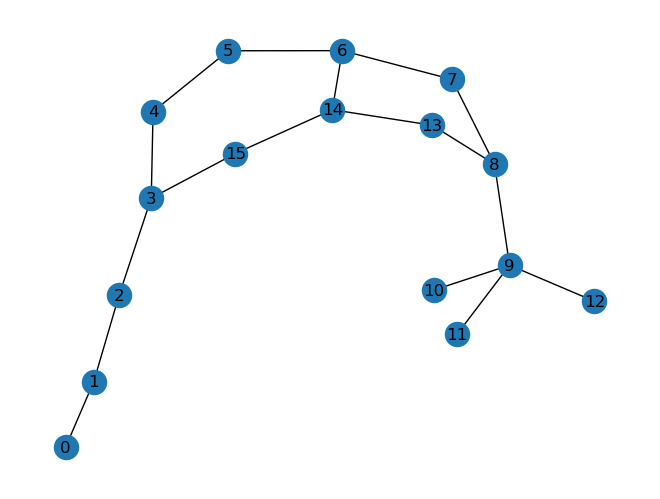

In [6]:
import networkx as nx
import matplotlib as  plt

def mol_to_nx(mol):
    G = nx.Graph()
    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(), element=atom.GetSymbol())
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), order=bond.GetBondType())
    return G

# Esempio di utilizzo
mol = Chem.MolFromSmiles('CCOc1ccc2nc(S(=O)(=O)N)sc2c1')
G = mol_to_nx(mol)
nx.draw(G, with_labels=True)
plt.show()
